In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
import pathlib
import os
import sys
sys.path.insert(1,'CHIME/modified/chime_ap')
sys.path.insert(1,'IHME')

import data_import as chime
from ihme import ihme

In [2]:
#CHIME
df_chime = chime.main('Simulator - Test Sheet - Sample Data.csv').raw_df
last_date = df_chime.date.tolist()[-1]

2020-06-09 16:59:52,999 - sir - INFO - Using doubling_time: 5
2020-06-09 16:59:53,681 - sir - INFO - Estimated date_first_hospitalized: 2020-01-29; current_date: 2020-06-09; i_day: 132
2020-06-09 16:59:53,800 - sir - INFO - len(np.arange(-i_day, n_days+1)): 163
2020-06-09 16:59:53,827 - sir - INFO - len(raw_df): 163


In [3]:
df_chime

,day,susceptible,infected,recovered,ever_infected,ever_hospitalized,hospitalized,ever_icu,icu,ever_ventilated,ventilated,admits_hospitalized,admits_icu,admits_ventilated,census_hospitalized,census_icu,census_ventilated,date
0,-132,3.271672e+08,266.666667,1.000000e+04,1.026667e+04,38.500000,NaN,1.155000e+03,NaN,770.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,2020-01-29
1,-131,3.271671e+08,306.319561,1.004444e+04,1.035076e+04,38.815365,0.315365,1.164461e+03,9.460951,776.307300,6.307300,0.315365,9.460951,6.307300,0.315365,9.460951,6.307300,2020-01-30
2,-130,3.271670e+08,351.868751,1.009550e+04,1.044737e+04,39.177624,0.362259,1.175329e+03,10.867776,783.552484,7.245184,0.362259,10.867776,7.245184,0.677624,20.328726,13.552484,2020-01-31
3,-129,3.271669e+08,404.190995,1.015414e+04,1.055833e+04,39.593751,0.416126,1.187813e+03,12.483791,791.875012,8.322528,0.416126,12.483791,8.322528,1.093751,32.812518,21.875012,2020-02-01
4,-128,3.271667e+08,464.293417,1.022151e+04,1.068580e+04,40.071754,0.478003,1.202153e+03,14.340104,801.435081,9.560069,0.478003,14.340104,9.560069,1.256389,47.152621,31.435081,2020-02-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,26,3.155191e+08,688150.829352,1.097022e+07,1.165837e+07,43718.898537,431.533583,1.311567e+06,12946.007488,874377.970741,8630.671659,431.533583,12946.007488,8630.671659,1294.100570,180526.899528,86101.559402,2020-07-05
159,27,3.154040e+08,688569.735498,1.108491e+07,1.177348e+07,44150.563703,431.665166,1.324517e+06,12949.954992,883011.274069,8633.303328,431.665166,12949.954992,8633.303328,1294.574384,180653.596128,86151.500128,2020-07-06
160,28,3.152888e+08,688946.875284,1.119968e+07,1.188862e+07,44582.334062,431.770359,1.337470e+06,12953.110766,891646.681246,8635.407178,431.770359,12953.110766,8635.407178,1294.969108,180769.349037,86196.201366,2020-07-07
161,29,3.151737e+08,689282.167007,1.131450e+07,1.200378e+07,45014.183203,431.849141,1.350425e+06,12955.474230,900283.664067,8636.982820,431.849141,12955.474230,8636.982820,1295.284666,180874.132664,86235.653455,2020-07-08


In [4]:
#IHME
inst_ihme = ihme(user_df='Simulator - Test Sheet - Sample Data 2 - necessary for IHME.csv',
                region_df='Simulator - Test Sheet - Sample Data.csv')
df_ihme = inst_ihme.predict(future=30)

In [5]:
#Neher Lab
df_neher = pd.read_csv('neher-lab/c19s.results.summary.tsv','\t')
df_neher.time = pd.to_datetime(df_neher.time)

In [6]:
#Importing file containing all countries
file = sorted(pathlib.Path('IHME/data').iterdir(), key=os.path.getmtime)[-1]
df_all = pd.read_csv('IHME/data/'+file.name)
df_all = df_all[['Date_reported','Country','Cumulative_cases','Cumulative_deaths']]
df_all.columns = ['date','group','cum_cases','cum_deaths']
df_all.date = pd.to_datetime(df_all.date)
df_all = df_all[df_all.group==df_ihme.group.unique()[0]]

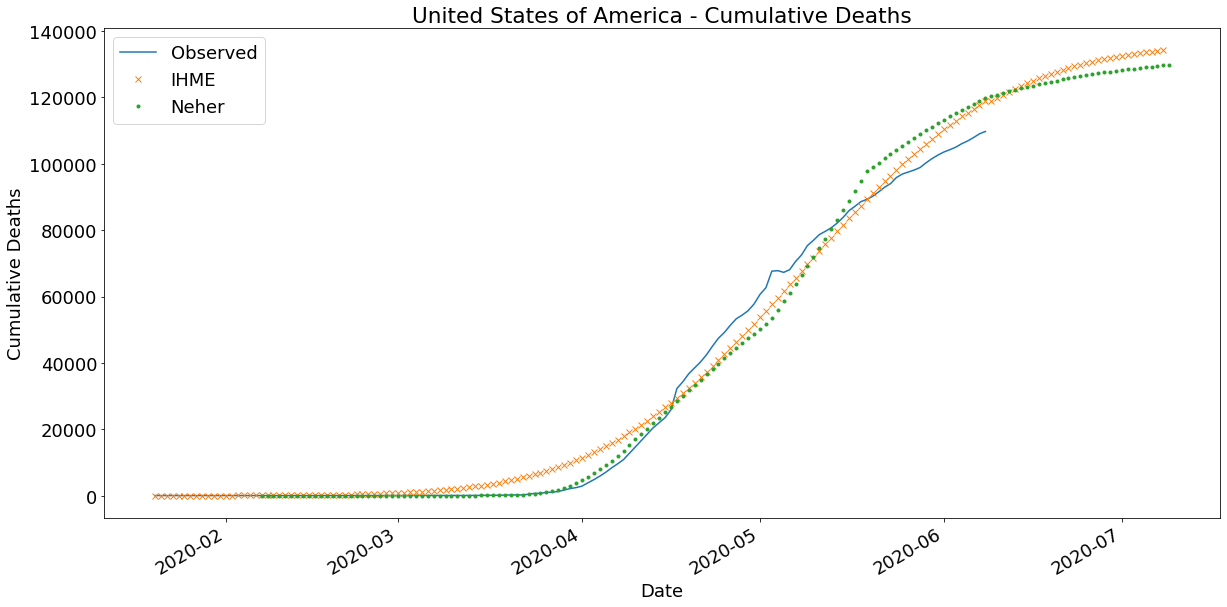

In [7]:
#Plot cumulative deaths
fig = plt.figure(figsize=(20,10))
plt.plot(df_ihme[df_ihme.date<=last_date].date, df_ihme[df_ihme.date<=last_date].cum_deaths, '-', label='Observed')
plt.plot(df_ihme[df_ihme.date<=last_date].date, df_ihme[df_ihme.date<=last_date].pred, 'x', label='IHME')
plt.plot(df_neher[df_neher.time<=last_date].time, 
         df_neher[df_neher.time<=last_date]['cumulative fatality (total) median'], '.', label = 'Neher')

plt.xlabel("Date")
plt.ylabel("Cumulative Deaths")
plt.title(df_ihme.group.unique()[0] + " - Cumulative Deaths")
plt.legend()
plt.rcParams.update({'font.size': 18})
fig.autofmt_xdate()
plt.savefig('plots/cum_deaths.png')

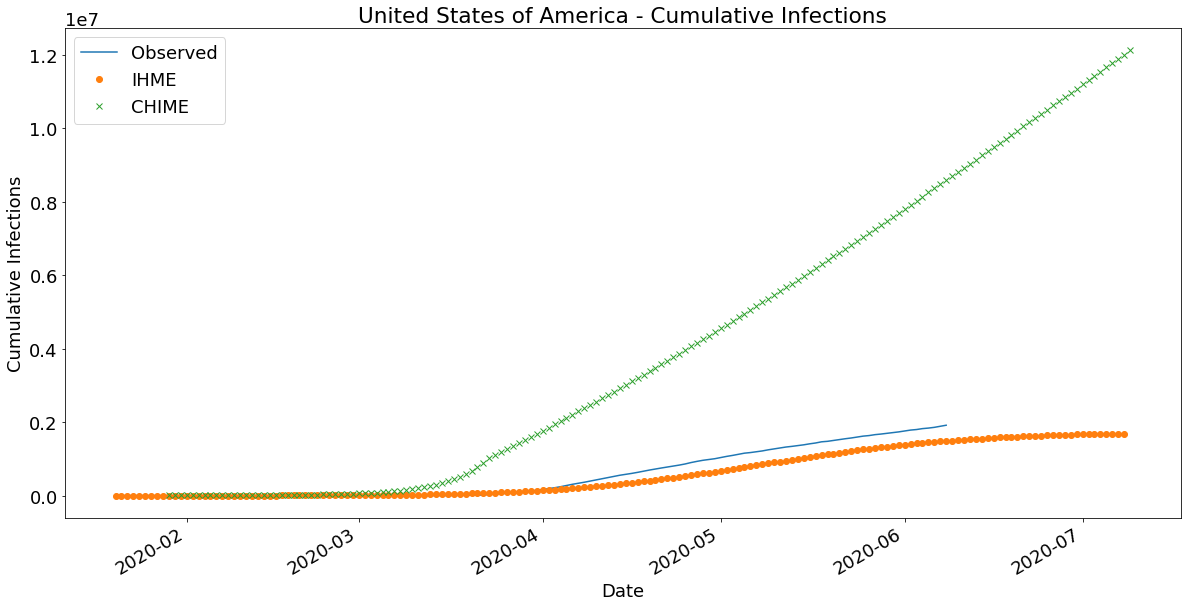

In [8]:
#Plot cumulative infections
fig = plt.figure(figsize=(20,10))
if df_all.shape[0]>0:
    plt.plot(df_all[df_all.date<=last_date].date, df_all[df_all.date<=last_date].cum_cases, '-', label='Observed')
plt.plot(df_ihme.date, df_ihme.infected, 'o', label='IHME')
plt.plot(df_chime.date, df_chime.ever_infected, 'x', label='CHIME')
# plt.plot(df_neher[(df_neher.time<=last_date)].time, 
#          df_neher[(df_neher.time<=last_date)]['infectious (total) median'], '.', label = 'Neher')#Not the correct column!

plt.xlabel("Date")
plt.ylabel("Cumulative Infections")
plt.title(df_ihme.group.unique()[0] + " - Cumulative Infections")
plt.legend()
plt.rcParams.update({'font.size': 18})
fig.autofmt_xdate()
plt.savefig('plots/cum_infections.png')

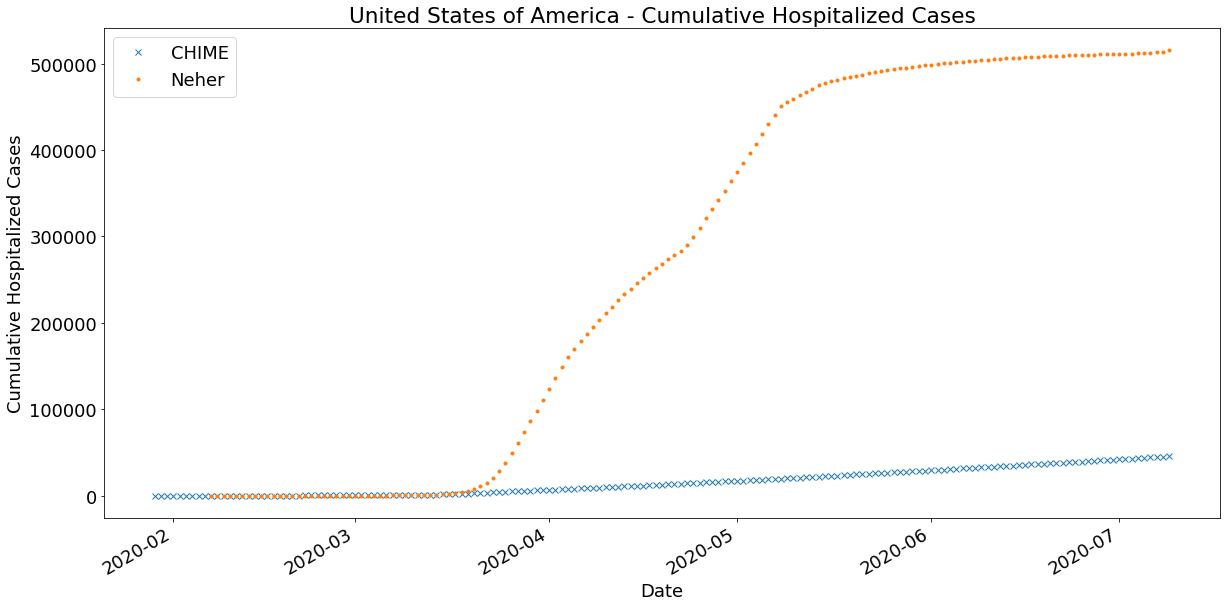

In [9]:
#Plot cumulative hospitalized cases
fig = plt.figure(figsize=(20,10))
plt.plot(df_chime.date, df_chime.ever_hospitalized, 'x', label='CHIME')
plt.plot(df_neher[(df_neher.time<=last_date)].time, 
         df_neher[(df_neher.time<=last_date)]['cumulative hospitalized (total) median'], '.', label = 'Neher')

plt.xlabel("Date")
plt.ylabel("Cumulative Hospitalized Cases")
plt.title(df_ihme.group.unique()[0] + " - Cumulative Hospitalized Cases")
plt.legend()
plt.rcParams.update({'font.size': 18})
fig.autofmt_xdate()
plt.savefig('plots/cum_hospitalized.png')

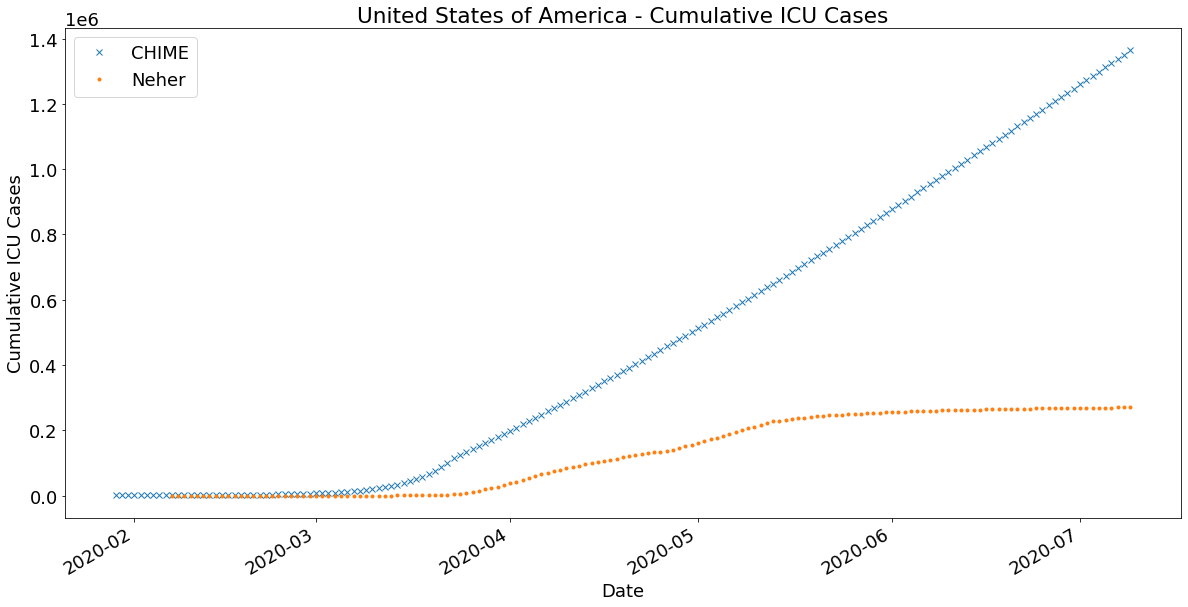

In [10]:
#Plot cumulative icu cases
fig = plt.figure(figsize=(20,10))
plt.plot(df_chime.date, df_chime.ever_icu, 'x', label='CHIME')
plt.plot(df_neher[(df_neher.time<=last_date)].time, 
         df_neher[(df_neher.time<=last_date)]['cumulative ICU (total) median'], '.', label = 'Neher')

plt.xlabel("Date")
plt.ylabel("Cumulative ICU Cases")
plt.title(df_ihme.group.unique()[0] + " - Cumulative ICU Cases")
plt.legend()
plt.rcParams.update({'font.size': 18})
fig.autofmt_xdate()
plt.savefig('plots/cum_icu.png')